# Проект "Рынок заведений общественного питания Москвы"

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# Оглавление 
1. [Загрузка и проверка данных](#загрузка)
2. [Анализ данных](#анализ)
    * [Cоотношение видов объектов общественного питания по количеству](#2.1)
    * [Соотношение сетевых и несетевых заведений по количеству](#2.2)
    * [Вид объекта общественного питания, которому характерно сетевое распространение](#2.3)
    * [ Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4)
    * [Среднее кол-во посадочных мест для каждого типа заведения](#2.5)
    * [Информация об улице](#2.6)
    * [Топ-10 улиц по количеству объектов общественного питания](#2.7)
    * [Число улиц с одним объектом общественного питания](#2.8)
    * [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#2.9)  
3. [Общий вывод](#общийвывод)
    * [Выводы по исследованию](#вывод)
    * [Рекомендации по исследованию](#рекомендации)
    * [Презентация](#презентация)

## Загрузка и проверка данных 
<a id="загрузка"></a> 

Импортируем нужные библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Загрузим датасет

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

Изучим датасет детальнее:

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df.sample()

,id,object_name,chain,object_type,address,number
13046,199941,Oh My Pho,нет,предприятие быстрого обслуживания,"город Москва, Дмитровское шоссе, дом 89",40


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15366.0,119720.066901,73036.130732,838.0,28524.0,144974.5,184262.25,223439.0
number,15366.0,59.547182,74.736833,0.0,12.0,40.0,80.00,1700.0


Проверим наличие дубликатов:

In [7]:
df.duplicated().sum()

0

Приведем данные в столбце chain к бинарному, численному виду для удобства вычисления

In [8]:
def yes_or_no(row):
    chain = row['chain']
    if chain == 'нет':
        return 0
    if chain == 'да':
        return 1
df['chain'] = df.apply(yes_or_no, axis=1)

Также были замечаны дубликаты, по типу "ресторан "Якитория"" и "Якитория" и дубликаты по типу "теремок" и "Теремок". Попробуем от них избавиться.

In [9]:
import re
#list(df['object_type'].unique())
def del_duplicates(row):
    name = row['object_name']
#    #name1 = ''.join(re.findall(r'«([^<>]+)»', name))
    name = (re.sub(r'[«»]', '', name))
#    #for i in list(df['object_type'].unique()):
#    name = name.lstrip('Кафе').rstrip('')
#    name = name.lstrip('ресторан').rstrip('') и т.д.
#    #return (re.sub(r'«([^<>]+)»', r'«([^<>]+)»', name))
    name = name.replace('кафе ', '')
    name = name.replace('столовая ', '')
    name = name.replace('закусочная ', '')      
    name = name.replace('кафетерий ', '')
    name = name.replace('буфет ', '')
    name = name.replace('магазин (отдел кулинарии) ', '')  
    name = name.replace('бар ', '') 
    name = name.replace('ресторан ', '')
    name = name.replace('Кафе ', '')
    name = name.replace('Ресторан ', '')
    name = name.replace(' burger king', '')
    return name.lower()

In [10]:
df['object_name'] = df.apply(del_duplicates, axis=1)

**Вывод по загрузке и проверке данных:**
- В данных отсутствуют пропуски
- Данные приведены к нужному типу, однако столбец с именами объектов нужно переделать.

In [39]:
df[df['object_name']== 'комбинат питания мгту им.н.э.баумана']

,id,object_name,chain,object_type,address,number,street
113,28608,комбинат питания мгту им.н.э.баумана,0,буфет,"город Москва, Бригадирский переулок, дом 3-5",34,Бригадирский переулок
114,28613,комбинат питания мгту им.н.э.баумана,0,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216,Бригадирский переулок
115,28614,комбинат питания мгту им.н.э.баумана,0,буфет,"город Москва, Бригадирский переулок, дом 3-5",12,Бригадирский переулок
2374,28603,комбинат питания мгту им.н.э.баумана,0,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100,2-я Бауманская улица
2375,28604,комбинат питания мгту им.н.э.баумана,0,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",150,2-я Бауманская улица
2376,28605,комбинат питания мгту им.н.э.баумана,0,кафетерий,"город Москва, 2-я Бауманская улица, дом 5, строение 1",35,2-я Бауманская улица
2377,28606,комбинат питания мгту им.н.э.баумана,0,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",16,2-я Бауманская улица
2378,28607,комбинат питания мгту им.н.э.баумана,0,закусочная,"город Москва, 2-я Бауманская улица, дом 5, строение 1",16,2-я Бауманская улица
2379,28609,комбинат питания мгту им.н.э.баумана,0,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",30,2-я Бауманская улица
2380,28610,комбинат питания мгту им.н.э.баумана,0,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",200,2-я Бауманская улица


## Анализ данных 
<a class="anchor" id="анализ"></a> 

### Cоотношение видов объектов общественного питания по количеству
<a id="2.1"></a> 

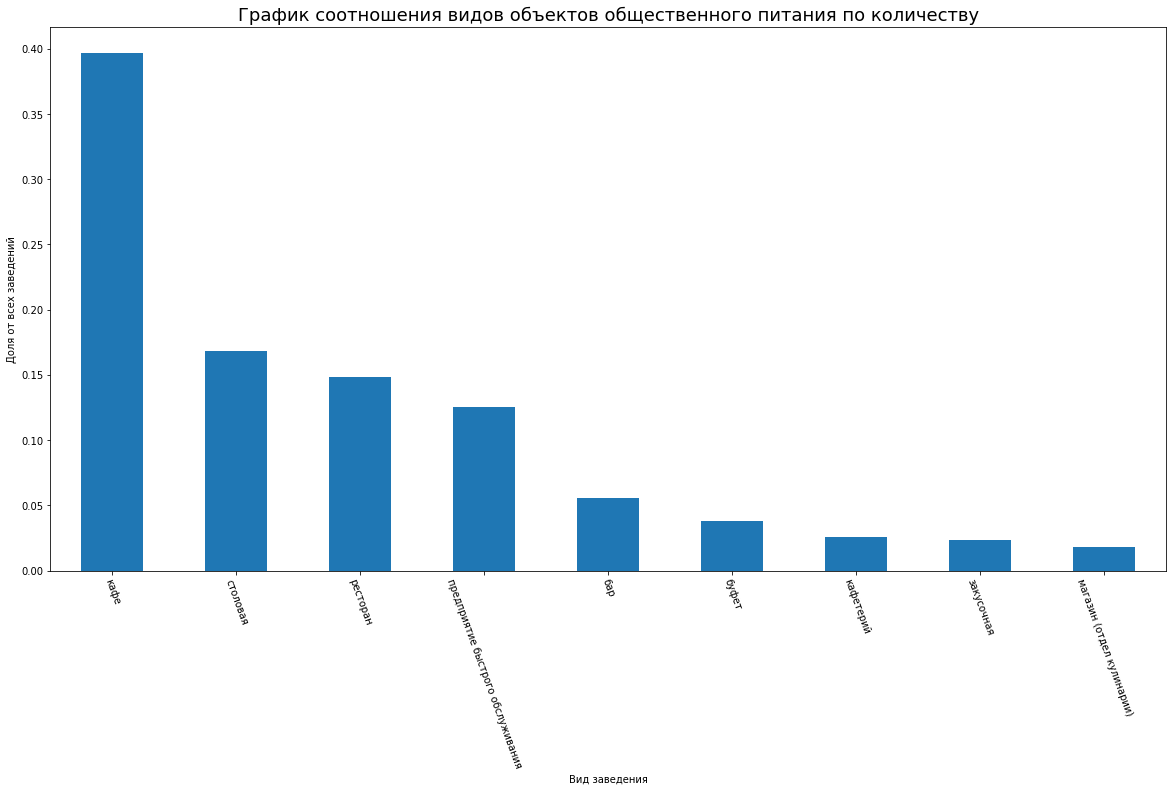

In [11]:
(df.groupby('object_type')['object_type'].count() / len(df)).sort_values(ascending=False).plot(kind='bar').plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
sns.set(font_scale = 1.5)
plt.title('График соотношения видов объектов общественного питания по количеству')
plt.ylabel('Доля от всех заведений')
plt.xlabel('Вид заведения')
locs, labels = plt.xticks()
plt.xticks(rotation='vertical')
plt.setp(labels, rotation=290)
plt.show()

- По кол-ву заведений на вид общественного питания лидируют кафе, столовая и ресторан. 
- В конце списка закусочная и магазин (отдел кулинарии).

### Соотношение сетевых и несетевых заведений по количеству
<a id="2.2"></a> 

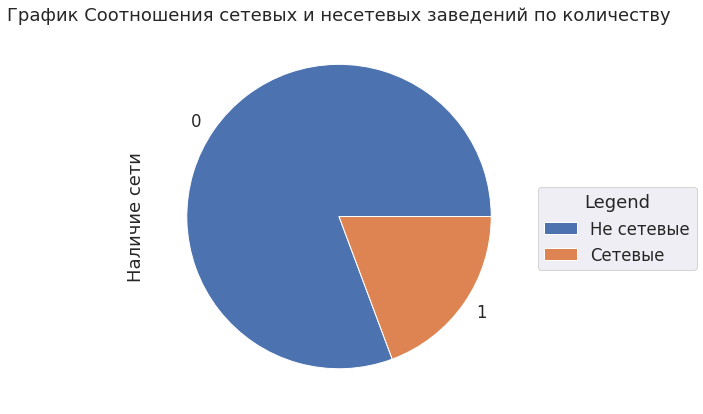

In [12]:
(df.groupby('chain')['chain'].count() / len(df)).plot(kind='pie')
plt.gcf().set_size_inches(15, 7)
plt.title('График Соотношения сетевых и несетевых заведений по количеству')
plt.ylabel('Наличие сети')
legend = plt.legend(['Не сетевые','Сетевые'], title = "Legend", bbox_to_anchor=(1, 0.6))
plt.show()

- Несетвых ресторанов больше примерно на 80%

### Вид объекта общественного питания, которому характерно сетевое распространение
<a id="2.3"></a> 

In [13]:
df_plot = df.groupby('object_type', as_index=False).agg({'object_type':['count','first'], 'chain':'mean'})
df_plot.columns = ['Кол-во объектов','Вид заведения','Доля сетевых заведений']
df_plot = df_plot.sort_values(by='Доля сетевых заведений', ascending=False)
df_plot

,Кол-во объектов,Вид заведения,Доля сетевых заведений
6,1923,предприятие быстрого обслуживания,0.411336
5,273,магазин (отдел кулинарии),0.285714
7,2285,ресторан,0.238074
3,6099,кафе,0.228890
2,360,закусочная,0.155556
4,398,кафетерий,0.130653
0,856,бар,0.043224
1,585,буфет,0.018803
8,2587,столовая,0.001160


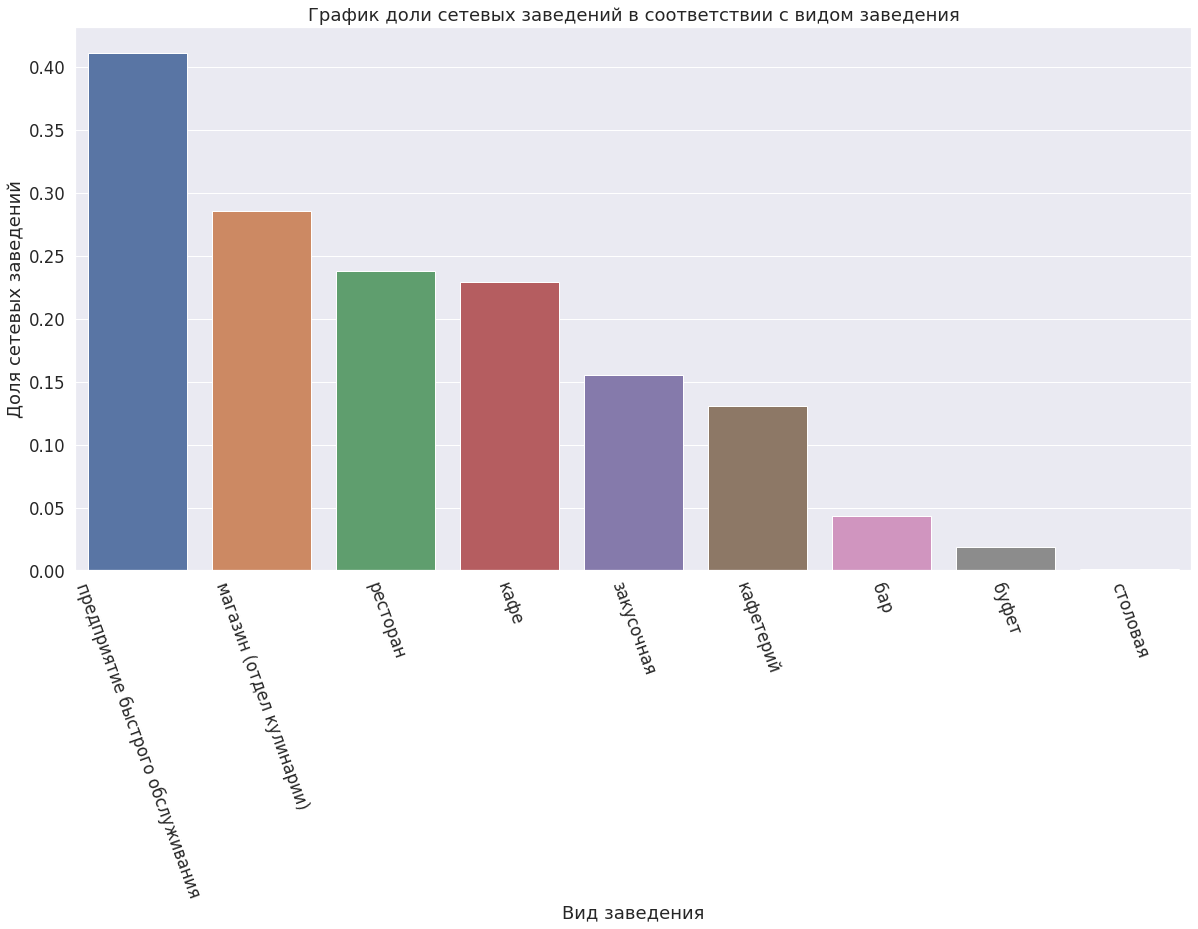

In [14]:
sns.set(font_scale = 1.5)
sns.barplot(x='Вид заведения', y='Доля сетевых заведений', data=df_plot)
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.title('График доли сетевых заведений в соответствии с видом заведения')
locs, labels = plt.xticks()
plt.setp(labels, rotation=290)
plt.show()

- Сетевое распространение характерно для: предприятий быстрого питания, магазнов (отеделов кулинарии), ресторанов и кафе
- Сетевое распространение не характерно для: баров, буфетов и столовых

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a id="2.4"></a> 

В данных присутствуют рестораны, помеченные как сети, которые по сути имеют только одно заведение, для анализа данного вопроса нам стоит убрать из выборки:

In [15]:
df_plot = df.query('chain == 1').groupby('object_name').agg({'id':'nunique', 'number':'mean'})
df_plot = df_plot.query('id != 1 and number != 0')

In [16]:
np.percentile(df_plot['number'], [50])

array([44.])

In [17]:
np.percentile(df_plot['id'], [50])

array([4.])

In [18]:
def big_or_small(row):
    count_ids = row['id']
    mean_number = row['number']
    if mean_number < np.percentile(df_plot['number'], [50]) and count_ids < np.percentile(df_plot['id'], [50]):
        return 'Мало мест, мало заведений'
    if mean_number >= np.percentile(df_plot['number'], [50]) and count_ids < np.percentile(df_plot['id'], [50]):
        return 'Много мест, мало заведений' 
    if mean_number >= np.percentile(df_plot['number'], [50]) and count_ids >= np.percentile(df_plot['id'], [50]):
        return 'Много мест, много заведений'
    if mean_number < np.percentile(df_plot['number'], [50]) and count_ids >= np.percentile(df_plot['id'], [50]):
        return 'Мало мест, много заведений'

In [19]:
df_plot['Места/Заведения'] = df_plot.apply(big_or_small, axis = 1)

In [20]:
df_plot = df_plot.groupby('Места/Заведения').agg({'Места/Заведения':'count'})
df_plot.columns = ['Кол-во']
df_plot = df_plot.reset_index()

In [21]:
df_plot = df_plot.reset_index().sort_values(by='Кол-во', ascending=False)

In [22]:
df_plot

,index,Места/Заведения,Кол-во
1,1,"Мало мест, много заведений",61
3,3,"Много мест, много заведений",57
2,2,"Много мест, мало заведений",52
0,0,"Мало мест, мало заведений",46


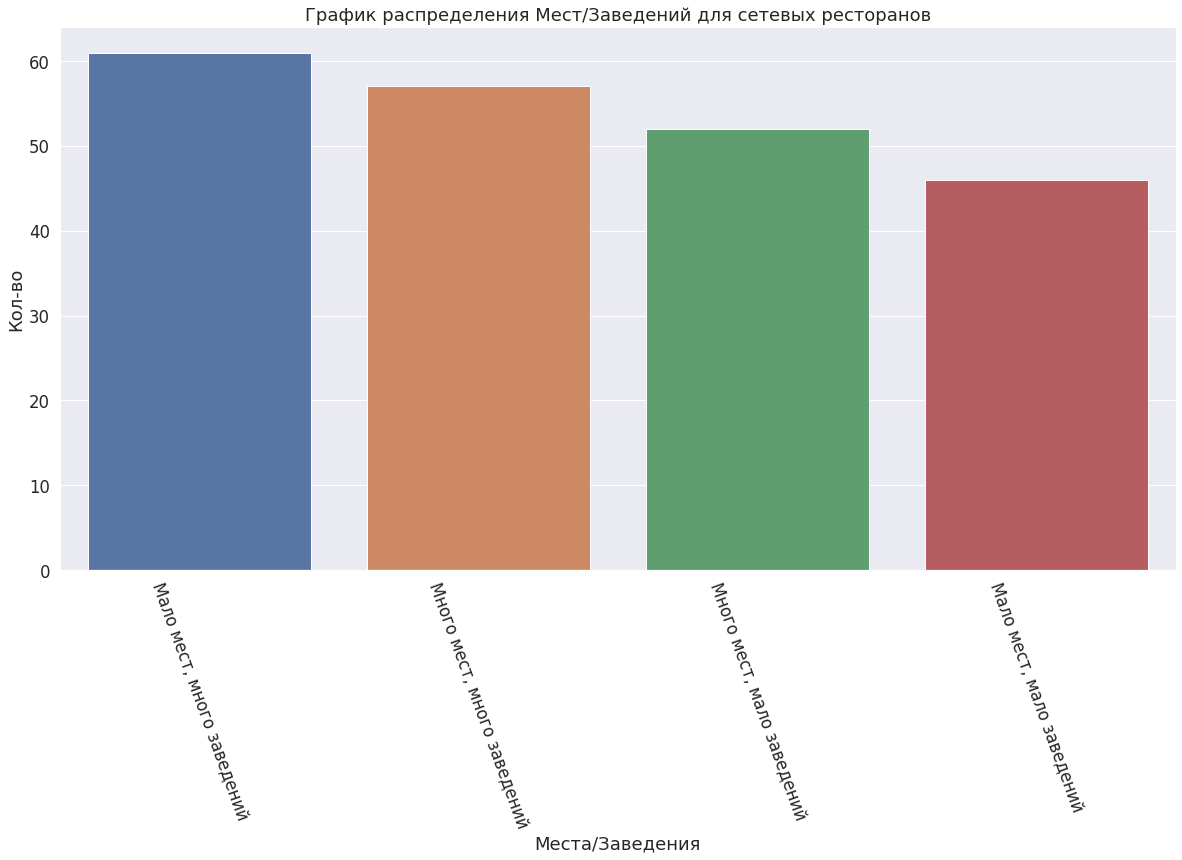

In [23]:
sns.set(font_scale = 1.5)
sns.barplot(x='Места/Заведения', y='Кол-во', data=df_plot)
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.title('График распределения Мест/Заведений для сетевых ресторанов')
locs, labels = plt.xticks()
plt.setp(labels, rotation=290)
plt.show()

- Преобладает тип: Мало мест, много заведений
- Меньше всего: Мало мест, мало заведений

### Среднее кол-во посадочных мест для каждого типа заведения
<a id="2.5"></a> 

In [24]:
df_plot = df.groupby('object_type').agg({'number':'mean'}).reset_index().sort_values(by='number', ascending=False)

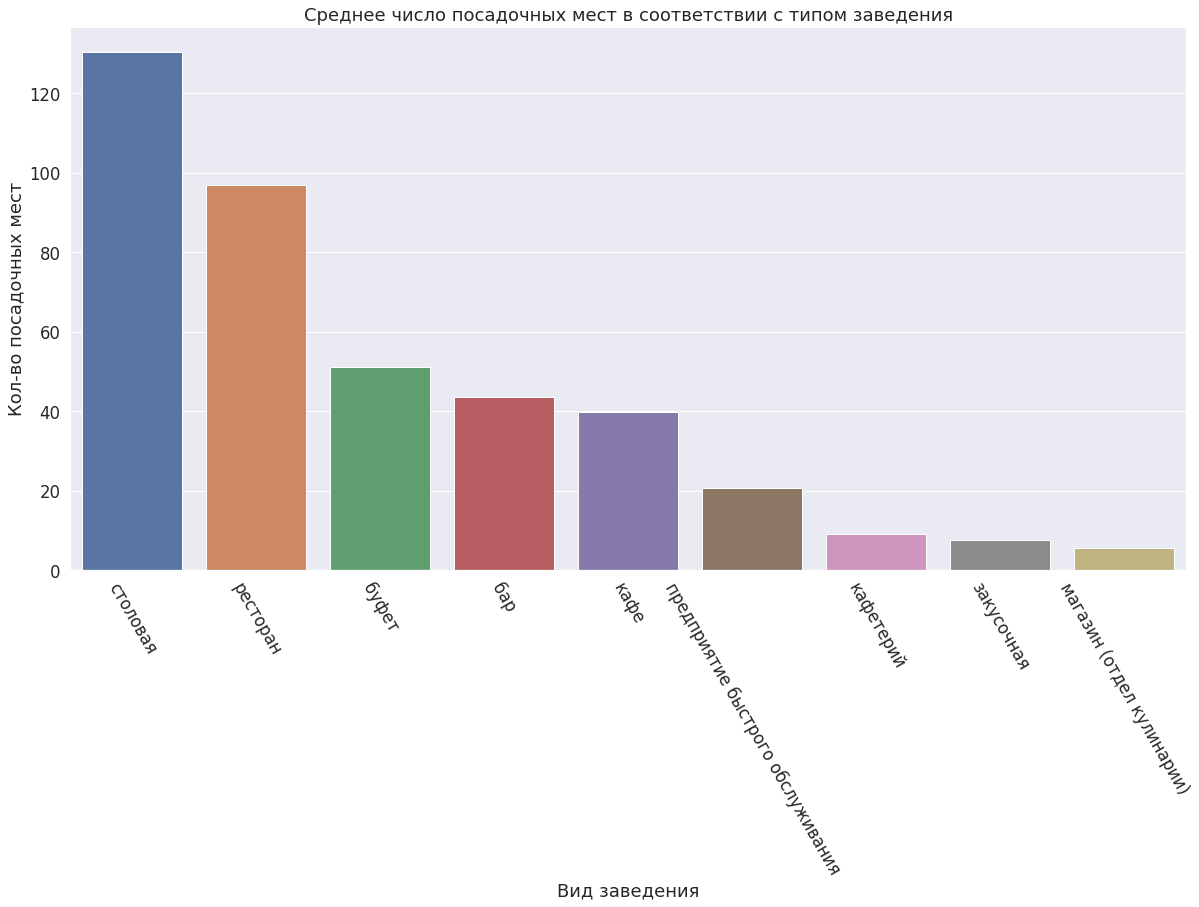

In [25]:
sns.set(font_scale = 1.5)
sns.barplot(x='object_type', y='number', data=df_plot)
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.ylabel('Кол-во посадочных мест')
plt.xlabel('Вид заведения')
plt.title('Среднее число посадочных мест в соответствии с типом заведения')
locs, labels = plt.xticks()
plt.setp(labels, rotation=300)
plt.show()

- В среднем наибольшее число посадочных мест в: столовых, ресторанах и буфетах
- В среднем наименьшее число посадочных меств: кафетериях, закусочных и магазинах (отделах кулинарии)

### Информация об улице
<a id="2.6"></a> 

In [26]:
def only_street_info(row):
    address_name = row['address']
    #adress_name = adress_name.lstrip('город Москва, ').rstrip('')
    #adress_name = adress_name.lstrip('город Москва, город Зеленоград, ').rstrip('')
    #adress_name = adress_name.lstrip('город Москва, ')
    address_name = address_name.split(",")
    if 'Зеленоград' in address_name[1]:
        return address_name[2]
    if 'поселок' in address_name[1]:
        return address_name[2]
    if 'деревня' in address_name[1]:
        return address_name[2]
    else:
        return address_name[1]
    #if adress_name.split(",")[0] == 'город Москва':
    #    return adress_name.split(",")[1]
    #if adress_name.split(",")[1] == ' город Зеленоград':
    #    return adress_name.split(",")[2]
    #return adress_name.lstrip('город Зеленоград,')

In [27]:
df['street'] = df['address']

In [28]:
df['street'] = df.apply(only_street_info, axis=1)

In [29]:
df.head(5)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,0,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,1,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневая метель,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания
<a id="2.7"></a> 

In [30]:
df_plot = df.groupby('street').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False).head(10)
df_plot

,street,id
1578,проспект Мира,204
1004,Профсоюзная улица,182
688,Ленинградский проспект,171
988,Пресненская набережная,167
409,Варшавское шоссе,161
691,Ленинский проспект,147
1542,поселение Сосенское,138
1574,проспект Вернадского,132
679,Кутузовский проспект,114
603,Каширское шоссе,112


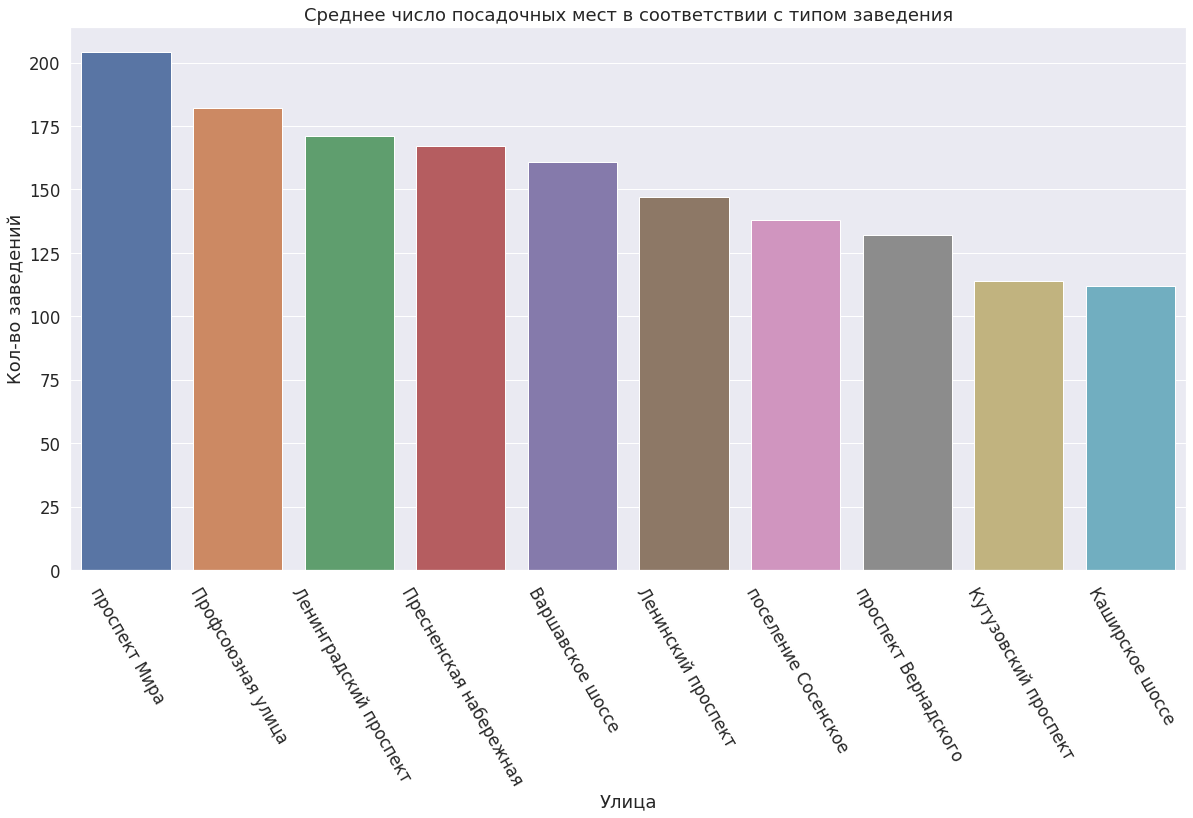

In [31]:
sns.set(font_scale = 1.5)
sns.barplot(x='street', y='id', data=df_plot)
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation='vertical')
plt.ylabel('Кол-во заведений')
plt.xlabel('Улица')
plt.title('Среднее число посадочных мест в соответствии с типом заведения')
locs, labels = plt.xticks()
plt.setp(labels, rotation=300)
plt.show()

- Наибольшее число заведений находятся на улицах: проспект Мира, Профсоюзная и Ленинградский проспект

### Число улиц с одним объектом общественного питания
<a id="2.8"></a> 

In [32]:
print('Число улиц с одним объектом общественного питаниия: {}'.format(len(df.groupby('street').agg({'id':'count'}).query('id == 1'))))

Число улиц с одним объектом общественного питаниия: 668


Посмотрим эти улицы детальнее:

In [33]:
df_plot = df.groupby('street').agg({'id':'count'}).query('id == 1').reset_index()
list_of_streets = list(df_plot['street'])

Т.к. название одной улицы может быть в нескольких населенных пунктах, то вернемся к прошлой таблице, чтобы можно было более детальнее изучить данные, если нужно:

In [34]:
df[['object_type', 'address', 'street', 'number']][df['street'].isin(list(df_plot['street']))].head()

,object_type,address,street,number
19,кафе,"город Москва, Филипповский переулок, дом 15/5",Филипповский переулок,20
61,столовая,"город Москва, Бабаевская улица, дом 3",Бабаевская улица,90
69,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",1-й Балтийский переулок,60
81,ресторан,"город Москва, улица Демьяна Бедного, дом 4",улица Демьяна Бедного,180
131,столовая,"город Москва, Будайская улица, дом 3",Будайская улица,45


- Число улиц с одним объектом общественного питаниия: 668
- В основном улицы в которых только одно заведение общественного питания находятся либо на границе второго кольца, либо на границах третьего кольца

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания
<a id="2.9"></a> 

Предположим, что улицы с больщим количеством объектов общественного питания имеет больше объектов, чем медианное значение кол-ва объектов на одной улице:

In [35]:
list_of_streets = list(df.groupby('street').agg({'id':'count'}).query('id > id.median()'))

In [36]:
df_plot = df[df['street'].isin(list(df_plot['street']))].head()
df_plot

,id,object_name,chain,object_type,address,number,street
19,153644,американская лаборатория десертов,0,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,столовая,0,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,хуанхэ,0,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,азербайджан,0,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,вгик,0,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица


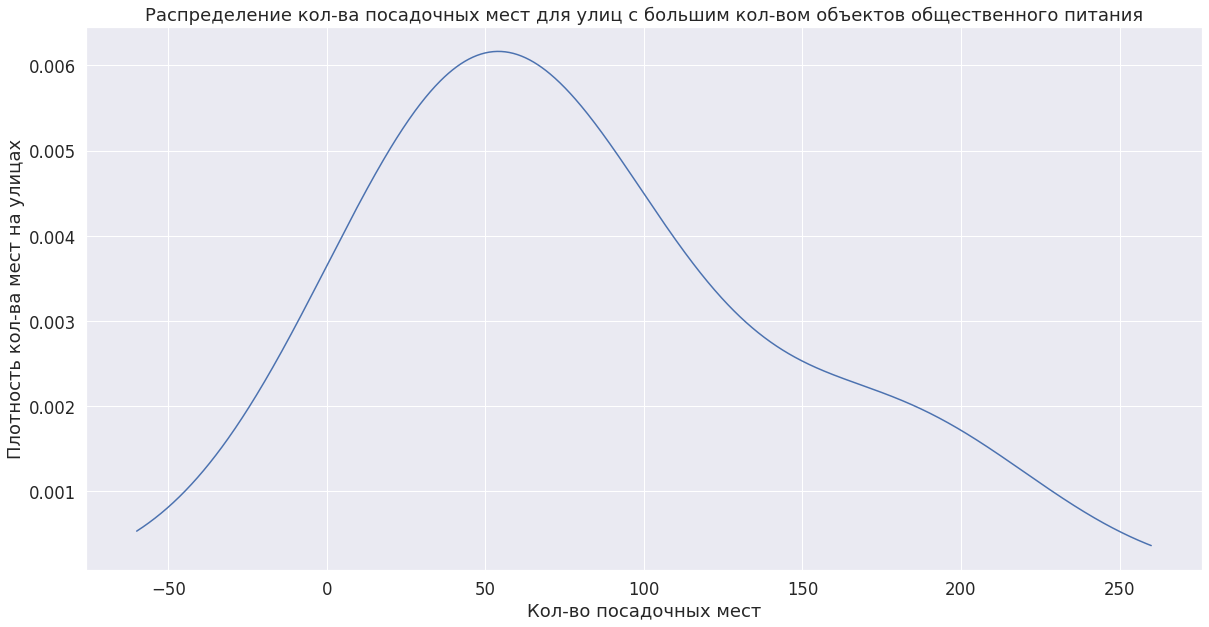

In [37]:
df_plot['number'].plot(kind='kde')
plt.gcf().set_size_inches(20, 10)
plt.ylabel('Плотность кол-ва мест на улицах')
plt.xlabel('Кол-во посадочных мест')
plt.title('Распределение кол-ва посадочных мест для улиц с большим кол-вом объектов общественного питания')
plt.show()

- Большее кол-во посадочных мест для мест с большим кол-вом объектов общественного питания находится в пределах 50 штук и постепенно снижается к 125

## Общий вывод:
<a id="общийвывод"></a> 

### Выводы по исследованию
<a id="вывод"></a> 

- По кол-ву заведений на вид общественного питания лидируют кафе, столовая и ресторан.
- В конце списка закусочная и магазин (отдел кулинарии).

- Несетвых ресторанов больше примерно на 80%

- Сетевое распространение характерно для: предприятий быстрого питания, магазнов (отеделов кулинарии), ресторанов и кафе
- Сетевое распространение не характерно для: баров, буфетов и столовых

- В среднем наибольшее число посадочных мест в: столовых, ресторанах и буфетах
- В среднем наименьшее число посадочных меств: кафетериях, закусочных и магазинах (отделах кулинарии)

- Наибольшее число заведений находятся на улицах: проспект Мира, Профсоюзная и Ленинградский проспект

- Число улиц с одним объектом общественного питаниия: 668
- В основном улицы в которых только одно заведение общественного питания находятся либо на границе второго кольца, либо на границах третьего кольца

- Большее кол-во посадочных мест для мест с большим кол-вом объектов общественного питания находится в пределах 50 штук и постепенно снижается к 125
- Преобладает тип: Мало мест, много заведений
- Меньше всего: Мало мест, мало заведений

### Рекомендации по исследованию
<a id="рекомендации"></a> 

- Кафе является доминирующим видом общественного питания. Ближайшие конкуренты по видам (столовая и ресторан) отстают по показателям кол-во заведений на вид общественного питания в два раза. Конкуренция среди таких заведений будет высокой
- Число посадочных мест должно быть в районе 50 и более
- Большинство единичных несетевых ресторанов находятся либо на границе второго кольца, либо на границах третьего кольца, скорее всего там наибольший шанс "выжить" для таких заведений, однако подобное заведение имеет явное УТП, которое направлено скорее на инфлюенсеров и "зевак", которыми полон центр города.

### Презентация
<a id="презентация"></a> 

In [38]:
print('Ссылка для презентации: {}'.format('https://drive.google.com/drive/folders/1De0panL6CsIDSnYmPU9hHxyM0Sr1Jv9C?usp=sharing'))

Ссылка для презентации: https://drive.google.com/drive/folders/1De0panL6CsIDSnYmPU9hHxyM0Sr1Jv9C?usp=sharing
